# One-body - MC

In [1]:
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd -q $workdir/

In [2]:
import os
import json
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))

plt.rcParams.update({'font.size':16,'legend.frameon':True,'figure.figsize':[12,8],'xtick.major.size':7,'ytick.major.size':7,'legend.labelspacing':1})

# Solution conditions and parameters

In [3]:
# Solution conditions

###############################################################################
pHs = {'pH2': { 'pH': [2],  'N':7, 'input':workdir+'/Charges_eq/Q_eq_pH2.pqr'},
       'pH5': { 'pH': [5],  'N':3, 'input':workdir+'/Charges_eq/Q_eq_pH5.pqr'}}
###############################################################################
Cp_range = [0.001, 0.002, 0.0040, 0.0070, 0.01, 0.015, 0.02, 0.025, 0.03]
#########################################################################

#LJ parameters                                                                                                                                       
eps = 0.12395 # epsilon for LJ interactions (in kJ/mol equal to 0.05 kT)
                                                                                                            
# Simulations steps                                                                                                         
micro = 10000
macro = 1000
nskip = 0

# Functions

In [4]:
def radius(Cp):
    ''' cell radius as a function of the protein concentration '''
    Na = 6.022e23
    return np.cbrt(3*1e27/(4* np.pi * Na * Cp))

# Production runs

In [5]:
def mkinput():
    js = {"temperature": 298.15,
             "geometry": {"type":"sphere", "radius": r}, 
               "mcloop": {"macro": macro, "micro": micro},
               "random": {"seed": "hardware"},
               "energy": [{"nonbonded_coulomblj": 
                                 {"lennardjones": {"mixing": "LB", 
                                                   "custom": {"Cl HNTR": {"sigma": 4.70,"eps": 0.01},
                                                              "Cl HLYS": {"sigma": 4.70,"eps": 0.01},
                                                              "Cl HARG": {"sigma": 3.50,"eps": 0.01}}},
                                  
                                      "coulomb": {"type":"plain","epsr": 78.7}}}
                         ],

               "atomlist": [
                ################
                #### C.ions ####
                ################,
                {"Cl" : {"mw":35.45, "sigma":4.6, "eps": eps, "q": -1, "dp": 50 }},
                ###################
                #### TERMINALS ####
                ###################
                {"CTR": {"mw": 16.0,"sigma": 3.13,"eps": eps,"q": -1}},
                {"HCTR": {"mw": 16.0,"sigma": 3.13,"eps": eps,"q": 0}},
                {"NTR": {"mw": 14.0,"sigma": 2.99,"eps": eps,"q": 0}},
                {"HNTR": {"mw": 14.0,"sigma": 2.99,"eps": eps,"q": 1}},
                ###################
                ####Hydrophobic####
                ###################
                {"ALA": {"mw": 66.0,"sigma": 5.02,"eps": eps,"q": 0}},
                {"ILE": {"mw": 102.0,"sigma": 5.8,"eps": eps,"q": 0}},
                {"LEU": {"mw": 102.0,"sigma": 5.8,"eps": eps,"q": 0}},
                {"MET": {"mw": 122.0,"sigma": 6.16,"eps": eps,"q": 0}},
                {"PHE": {"mw": 138.0,"sigma": 6.41,"eps": eps,"q": 0}},
                {"VAL": {"mw": 90.0,"sigma": 5.56,"eps": eps,"q": 0}},
                {"PRO": {"mw": 90.0,"sigma": 5.56,"eps": eps,"q": 0}},
                {"GLY": {"mw": 54.0,"sigma": 4.69,"eps": eps,"q": 0}},
                #########################
                #### Not Hydrophobic ####
                #########################
                {"ARG": {"mw": 144.0,"sigma": 6.50,"eps": eps,"q": 0}},
                {"HARG": {"mw": 144.0,"sigma": 6.50,"eps": eps,"q": 1}},
                {"LYS": {"mw": 116.0,"sigma": 6.05,"eps": eps,"q": 0}},
                {"HLYS": {"mw": 116.0,"sigma": 6.05,"eps": eps,"q": 1}},
                {"ASP": {"mw": 110.0,"sigma": 5.94,"eps": eps,"q": -1}},
                {"HASP": {"mw": 110.0,"sigma": 5.94,"eps": eps,"q": 0}},
                {"LASP": {"mw": 110.0,"sigma": 5.94,"eps": eps,"q": 2}},
                {"GLU": {"mw": 122.0,"sigma": 6.16,"eps": eps,"q": -1}},
                {"HGLU": {"mw": 122.0,"sigma": 6.16,"eps": eps,"q": 0}},
                {"LGLU": {"mw": 122.0,"sigma": 6.16,"eps": eps,"q": 2}},
                {"GLN": {"mw": 120.0,"sigma": 6.12,"eps": eps,"q": 0}},
                {"ASN": {"mw": 108.0,"sigma": 5.91,"eps": eps,"q": 0}},
                {"HIS": {"mw": 130.0,"sigma": 6.29,"eps": eps,"q": 0}},
                {"HHIS": {"mw": 130.0,"sigma": 6.29,"eps": eps,"q": 1}},
                {"SER": {"mw": 82.0,"sigma": 5.39,"eps": eps,"q": 0}},
                {"THR": {"mw": 94.0,"sigma": 5.64,"eps": eps,"q": 0}},
                {"TYR": {"mw": 154.0, "sigma": 6.65,"eps": eps, "q": -1}},
                {"HTYR": {"mw": 154.0,"sigma": 6.65,"eps": eps,"q": 0}},
                {"CYS": {"mw": 103.0,"sigma": 5.72,"eps": eps,"q": -1}},
                {"HCYS":{"mw": 103.0,"sigma": 5.72,"eps": eps,"q": 0}},
                {"CYX": {"mw": 103.0,"sigma": 5.72,"eps": eps,"q": 0}},
                {"TRP": {"mw": 176.0,"sigma": 6.95,"eps": eps,"q": 0}},
                {"H": {"pactivity": pH, "implicit": True } }
                    ],
          
       
          "moleculelist": [{"protein": {"structure": Input, "insdir":[0,0,0], "insoffset":[0,0,0], "keepcharges":True, 'rotate': False, 'keeppos':False, 'rigid':False}},
                           {"CL": {"atoms": ["Cl"], "atomic":True}}
                          ],
          
          "insertmolecules": [{"protein": {"N": 1, "inactive": False }},
                              {"CL": {"N": N, "inactive": False}}
                             ],

          
          "moves": 
                [{"transrot": {"molecule": "CL", "dir":[1,1,1], "repeat":10}}],
                 

          "analysis": [
            {"density": { "nstep": 1000, 'nskip': nskip}},
            {"multipole": {"nstep": 1000, 'nskip': nskip} }, 
            {"savestate": {"file": "state.json"} }, 
            {"xtcfile": {"file": "traj.xtc", "nstep": 10000, 'nskip': nskip} },
            {"systemenergy": {"file": "energy.dat", "nstep": 1000, 'nskip': nskip} },
            {"virtualvolume": {"dV": 0.1, "nstep": 1, 'nskip': nskip}},
            
            #Total charge as a function of the number of steps
            {"reactioncoordinate": {"file": "Q_total.dat", "nstep": 1, "type": "system", "property": "Q", 'nskip': nskip}},
            {"reactioncoordinate": {"file": "Q_protein.dat", "nstep":1, "type": "molecule", "index": 0, "property": "Q", 'nskip': nskip}},
            
              
            #Atom densities as function of the distance from the center of the cell
            {"atomprofile": {"file": "Cl_profile.txt", "nstep": 1, "atoms":["Cl"], "origo": [0,0,0], "dr":0.20, "charge":False, 'nskip': nskip}},
            ]}  

    with open('input.json', 'w') as f:
        json.dump(js, f, indent=4)


###############################################################################################################################

for name, prop in pHs.items():
    %mkdir $name
    %cd -q $name
    for pH in prop ['pH']:
        %mkdir $pH
        %cd -q $pH
        for Cp in Cp_range:
            r = radius(Cp)
            %mkdir $Cp
            %cd -q $Cp
            
            N = prop['N']
            Input= prop['input'] 
            mkinput()

            exists = os.path.isfile('state.json')
            #if exists:
                #!export OMP_NUM_THREADS=1;/Users/marco/faunus/faunus -i input.json -s state.json -v 6 #> out
            #    !sbatch ../../../submit_state.sh   
            #else:
                #!export OMP_NUM_THREADS=1;/Users/marco/faunus/faunus -i input.json  -v 6 #> out
            #    !sbatch ../../../submit.sh
                
            %cd -q ../
        %cd -q ../
    %cd -q ../

mkdir: pH2: File exists
mkdir: 2: File exists
mkdir: 0.001: File exists
mkdir: 0.002: File exists
mkdir: 0.004: File exists
mkdir: 0.007: File exists
mkdir: 0.01: File exists
mkdir: 0.015: File exists
mkdir: 0.02: File exists
mkdir: 0.025: File exists
mkdir: 0.03: File exists
mkdir: pH5: File exists
mkdir: 5: File exists
mkdir: 0.001: File exists
mkdir: 0.002: File exists
mkdir: 0.004: File exists
mkdir: 0.007: File exists
mkdir: 0.01: File exists
mkdir: 0.015: File exists
mkdir: 0.02: File exists
mkdir: 0.025: File exists
mkdir: 0.03: File exists


# Density profiles

<ipython-input-8-abd42901ea2f>:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameone" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('MC_profiles.png', frameone=True, bbox_inches='tight', dpi=300)


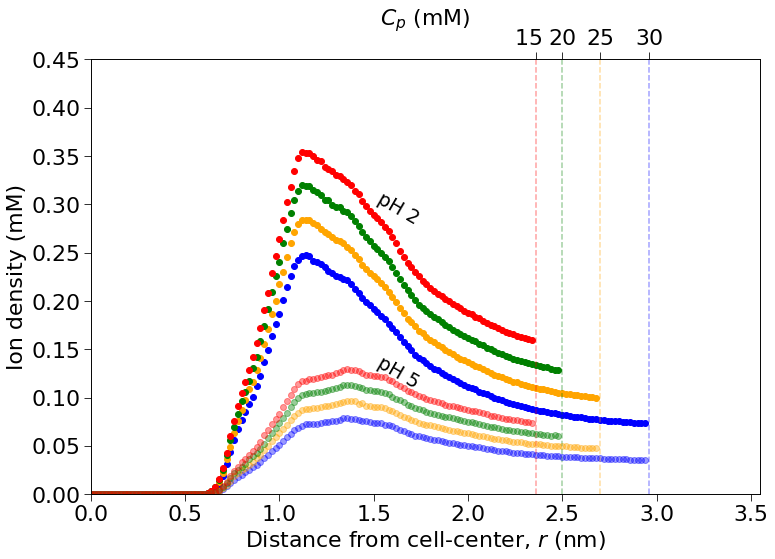

In [8]:
######################################
Cp_range = [ 0.015, 0.02, 0.025, 0.03]
######################################

fig = plt.figure()    
ax1 = fig.add_subplot(111)    
ax2 = ax1.twiny()

###################################
fontsize = 22 
colors = ['b', 'orange', 'g', 'r']
###################################

for name, prop in pHs.items():
    for pH in prop ['pH']:
        for i, Cp in enumerate(Cp_range):

            path = '/'+str(name)+'/'+str(pH)+'/'+str(Cp)+'/'
            
            if pH ==2:
                x, y = np.loadtxt(workdir+path+'Cl_profile.txt',unpack=True, usecols=(0,2))
                ax1.plot(x[:-1]/10, y[:-1], '.', markersize=12, color=colors[i])
    
            if pH ==5:
                x, y = np.loadtxt(workdir+path+'Cl_profile.txt',unpack=True, usecols=(0,2))
                ax1.plot(x[:-1]/10, y[:-1], '.', markersize=12, alpha=0.4, color=colors[i])
            
            ax1.plot([x[-1]/10,x[-1]/10],[0, 0.50], linestyle='--', color=colors[i], alpha=0.2)
            #print(x[-1])
            
ax1.text(1.5, 0.28, r'pH 2', fontsize='large', color='k', rotation=-30)
ax1.text(1.5, 0.11, r'pH 5', fontsize='large', color='k', rotation=-30)
#ax1.legend(frameon=False, fontsize=16, ncol=1, loc=2)
ax1.set_xlabel('Distance from cell-center, $r$ (nm)', fontsize=fontsize)

ax1.set_ylabel('Ion density (mM)', fontsize=fontsize)
ax1.set_ylim(0, 0.45)
ax1.set_xlim(0, 3.55)

ax2.set_xbound(ax1.get_xbound())
ax2.set_xlabel('$C_{p}$ (mM)', fontsize=fontsize)
plt.setp( ax2, xticks = [ 2.36, 2.50, 2.70, 2.96 ], xticklabels = [ '15  ', '20', '25', '30'] ) 
ax1.tick_params(labelsize=fontsize)
ax2.tick_params(labelsize=fontsize)
plt.savefig('MC_profiles.png', frameone=True, bbox_inches='tight', dpi=300)